##**Antenna Radiation Pattern Equations**
The simulation models the radiation pattern of a half-wave dipole antenna. Below are the key equations used in the code.

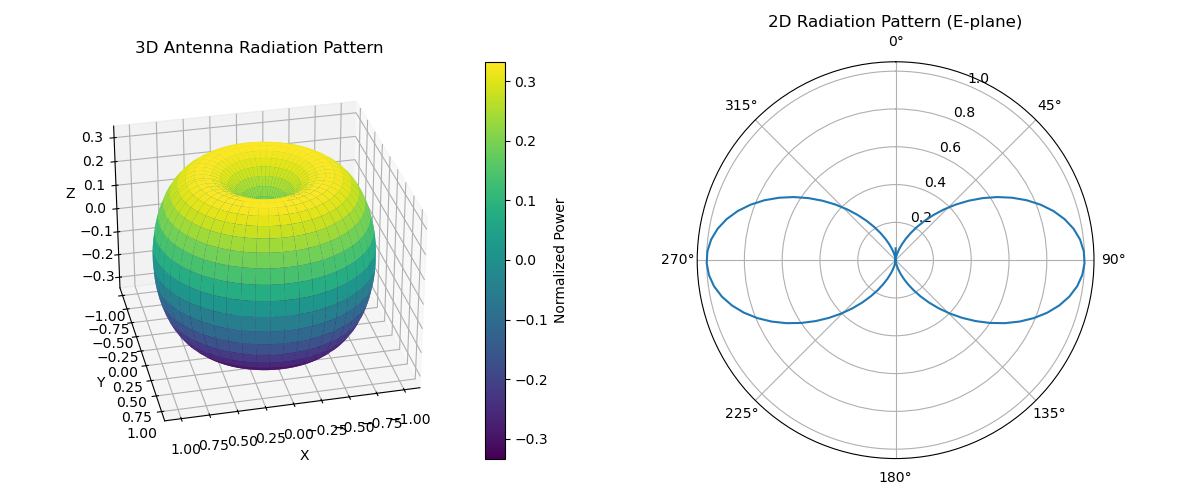

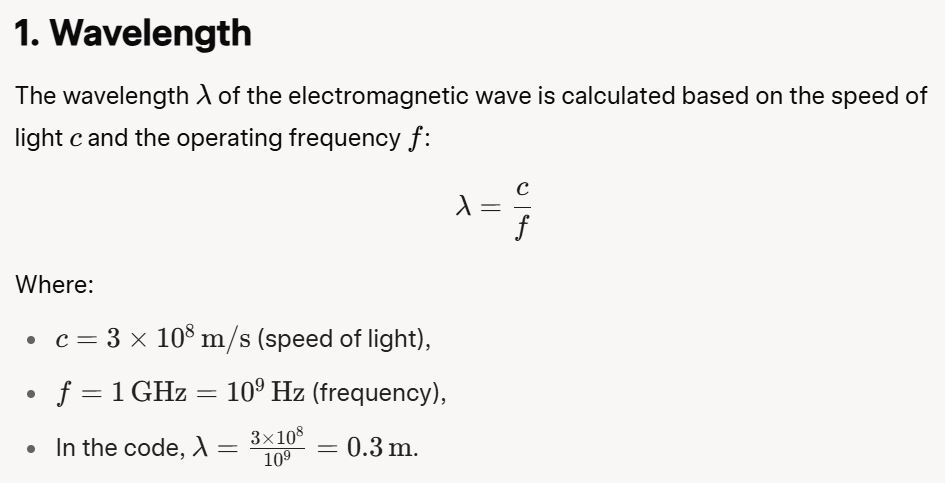

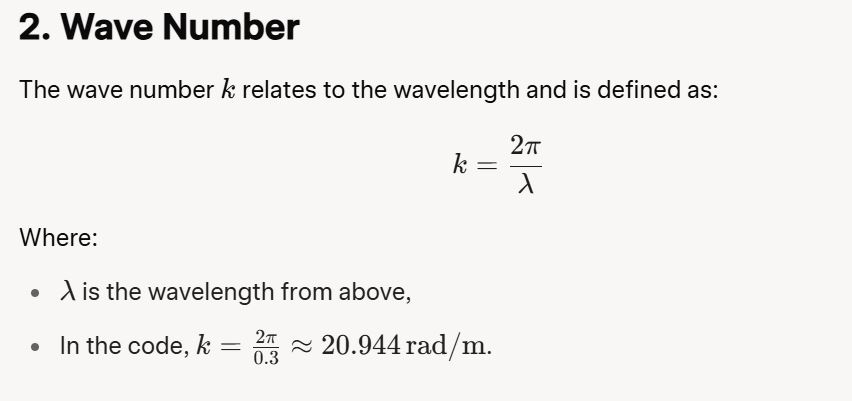

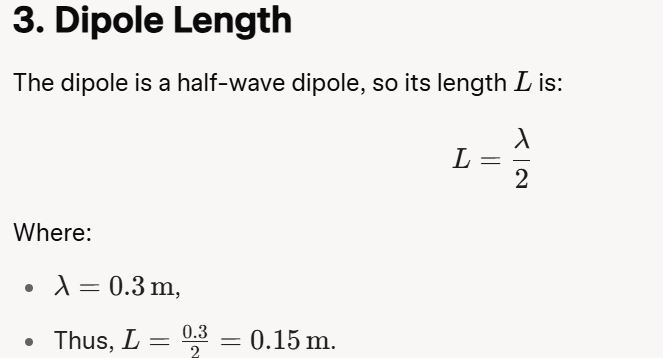

##**4. Radiation Pattern (Normalized Power)**
The radiation pattern for a half-wave dipole antenna in the far field is proportional to the normalized power pattern. The electric field pattern for a half-wave dipole is given by:

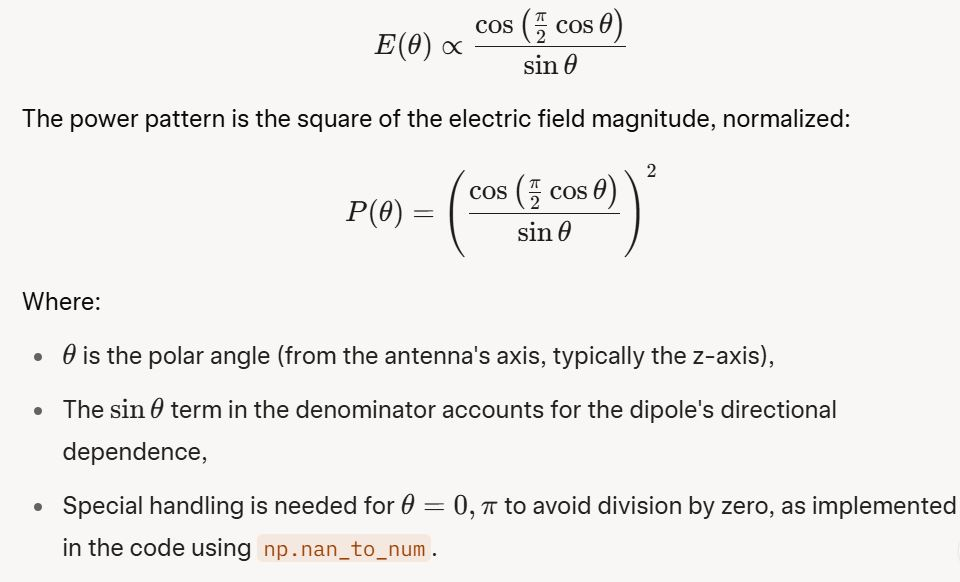

##**5. Coordinate Transformation for 3D Visualization**
To plot the radiation pattern in 3D, the pattern is converted to Cartesian coordinates using spherical coordinates:

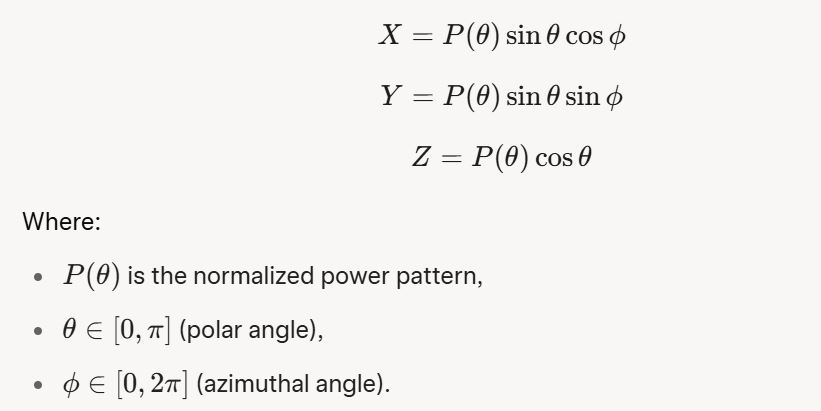

These coordinates are used to generate the 3D surface plot, with $P(\theta)$ scaling the radial distance.
##**6. 2D Polar Plot (E-Plane)**
For the 2D polar plot in the E-plane (where $\phi = 0$), the pattern is evaluated over $\theta \in [0, 2\pi]$

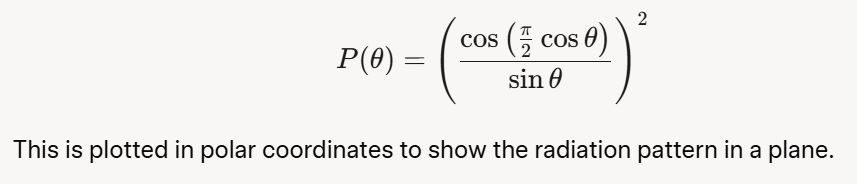

import libraries

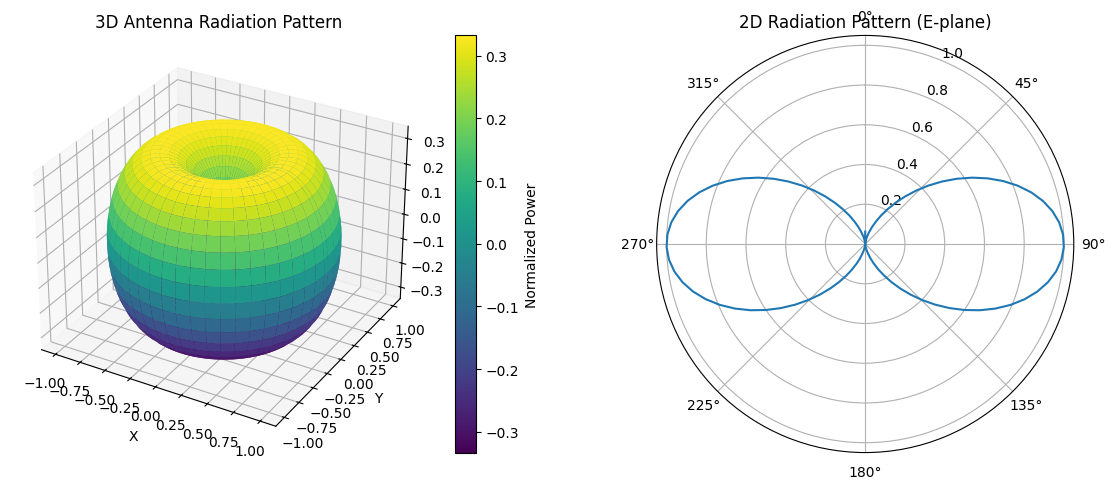

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parameters
frequency = 1e9  # 1 GHz
wavelength = 3e8 / frequency  # Wavelength in meters
k = 2 * np.pi / wavelength  # Wave number
length = wavelength / 2  # Dipole length (half-wavelength dipole)

# Define angular grid for 3D pattern
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

# Dipole antenna radiation pattern (normalized power)
# For a half-wave dipole, the pattern is proportional to (sin(theta))^2
def dipole_pattern(theta):
    # Avoid division by zero at theta = 0 or pi
    with np.errstate(divide='ignore', invalid='ignore'):
        pattern = (np.cos(np.pi / 2 * np.cos(theta)) / np.sin(theta))**2
        pattern = np.nan_to_num(pattern, nan=0.0, posinf=0.0, neginf=0.0)
    return pattern

# Calculate radiation pattern
pattern = dipole_pattern(theta)

# Convert to Cartesian coordinates for 3D plotting
X = pattern * np.sin(theta) * np.cos(phi)
Y = pattern * np.sin(theta) * np.sin(phi)
Z = pattern * np.cos(theta)

# Create 3D plot
fig = plt.figure(figsize=(12, 5))

# 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('3D Antenna Radiation Pattern')
fig.colorbar(surf, ax=ax1, label='Normalized Power')

# 2D polar plot (E-plane, phi=0)
ax2 = fig.add_subplot(122, projection='polar')
theta_2d = np.linspace(0, 2 * np.pi, 100)
pattern_2d = dipole_pattern(theta_2d)
ax2.plot(theta_2d, pattern_2d)
ax2.set_title('2D Radiation Pattern (E-plane)')
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)

plt.tight_layout()
plt.show()

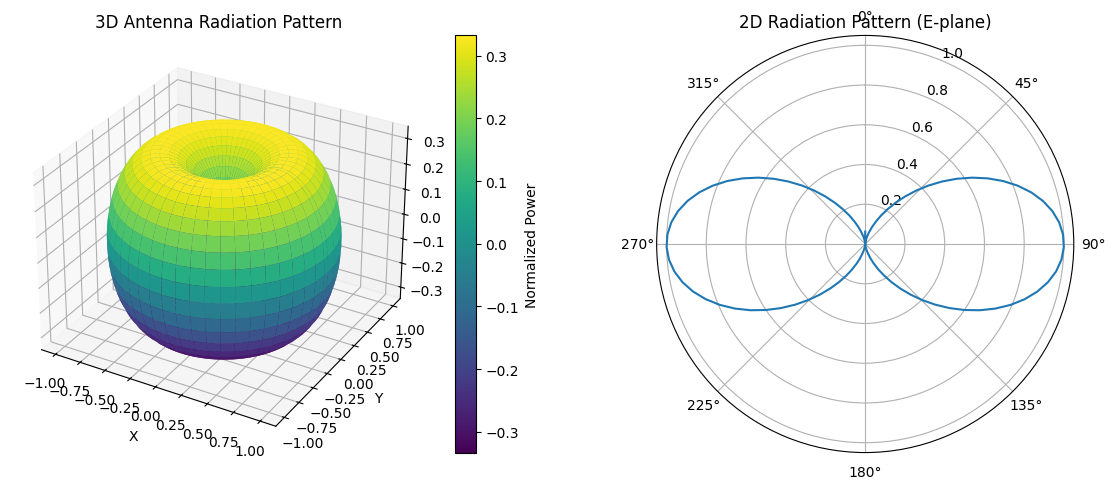

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

# Parameters
frequency = 1e9  # 1 GHz
wavelength = 3e8 / frequency  # Wavelength in meters
k = 2 * np.pi / wavelength  # Wave number
length = wavelength / 2  # Dipole length (half-wavelength dipole)

# Define angular grid for 3D pattern
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(theta, phi)

# Dipole antenna radiation pattern (normalized power)
def dipole_pattern(theta):
    with np.errstate(divide='ignore', invalid='ignore'):
        pattern = (np.cos(np.pi / 2 * np.cos(theta)) / np.sin(theta))**2
        pattern = np.nan_to_num(pattern, nan=0.0, posinf=0.0, neginf=0.0)
    return pattern

# Calculate radiation pattern
pattern = dipole_pattern(theta)

# Convert to Cartesian coordinates for 3D plotting
X = pattern * np.sin(theta) * np.cos(phi)
Y = pattern * np.sin(theta) * np.sin(phi)
Z = pattern * np.cos(theta)

# Create figure
fig = plt.figure(figsize=(12, 5))

# 3D surface plot
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('3D Antenna Radiation Pattern')
fig.colorbar(surf, ax=ax1, label='Normalized Power')

# 2D polar plot (E-plane, phi=0)
ax2 = fig.add_subplot(122, projection='polar')
theta_2d = np.linspace(0, 2 * np.pi, 100)
pattern_2d = dipole_pattern(theta_2d)
ax2.plot(theta_2d, pattern_2d)
ax2.set_title('2D Radiation Pattern (E-plane)')
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)

# Animation function for rotating the 3D plot
def animate(i):
    ax1.view_init(elev=30, azim=i)
    return surf,

# Create animation
ani = animation.FuncAnimation(fig, animate, frames=360, interval=50, blit=False)

plt.tight_layout()
plt.show()

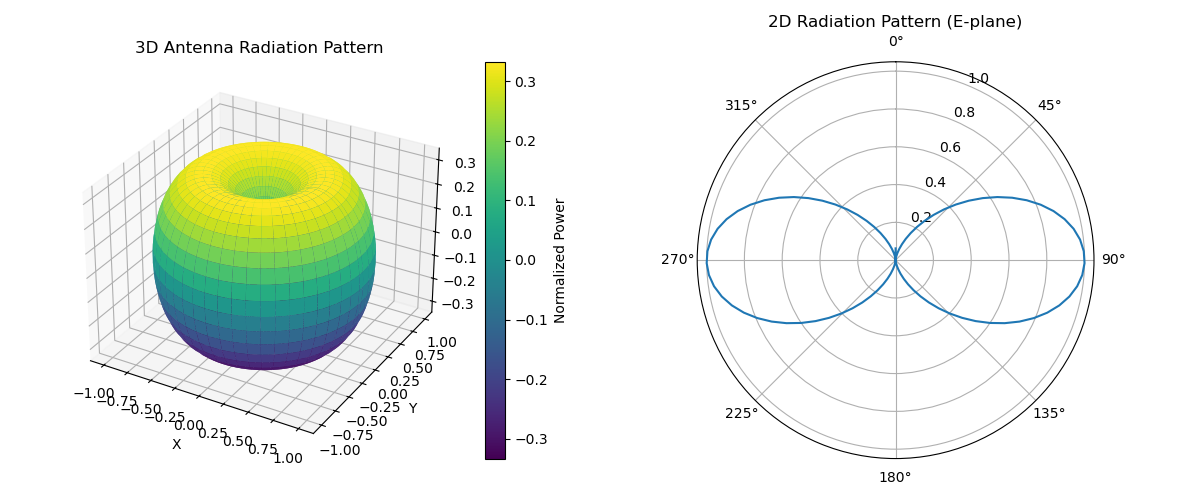